# CARICO IL DATASET

In [1]:
import DS_functions as df

In [ ]:
df.steam.head()

# RQ3 test

#### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

La domanda che ci è stata posta non ha una risposta diretta. Per rispondere a quest'ultima, inizialmente abbiamo plotted, con la funzione richiesta nell'esercizio, il numero di recenzioni in intervalli di tempo da 15 minuti. In questa prima rappresentazione (figura 1) abbiamo notato due massimi: Il primo tra le 14 e le 16 ed il secondo tra le 18 e le 19. Tuttavia i bar del grafico in quegli intorni sono piuttosto costanti, quindi una rappresentazione con intervalli più larghi potrebbe rappresentare meglio i dati (figura 2).

## Forse la media?


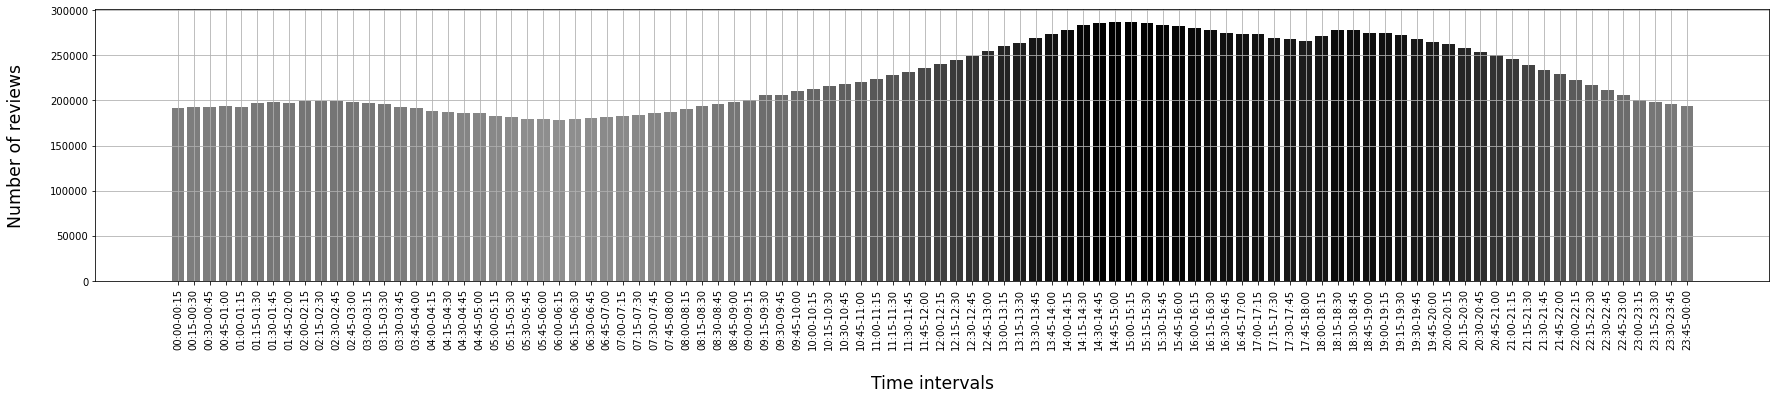

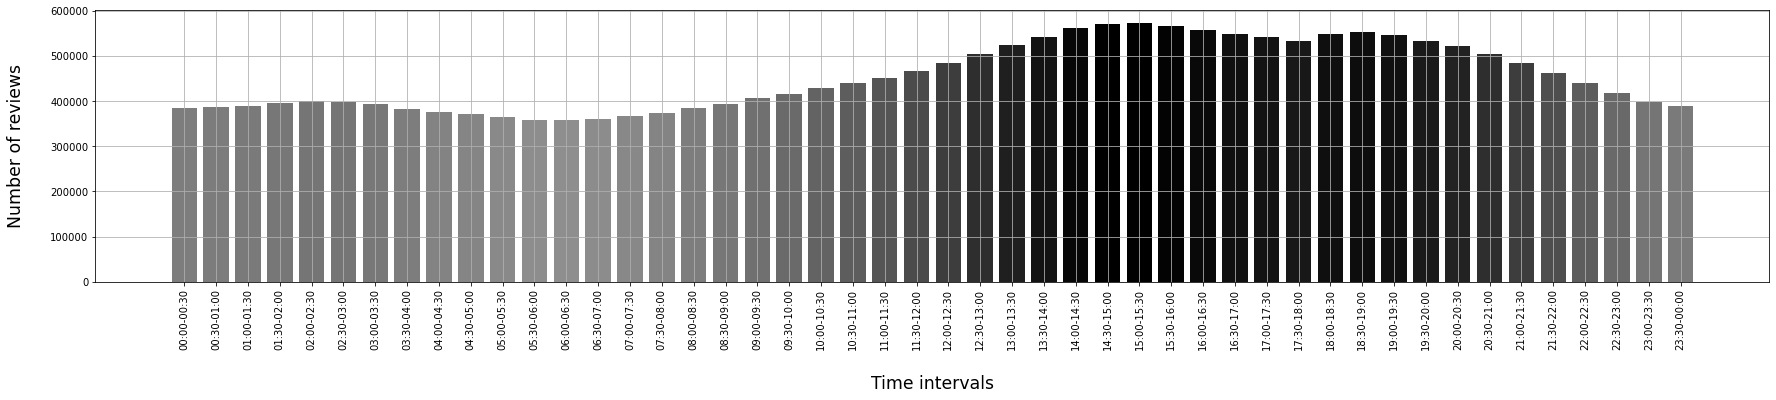

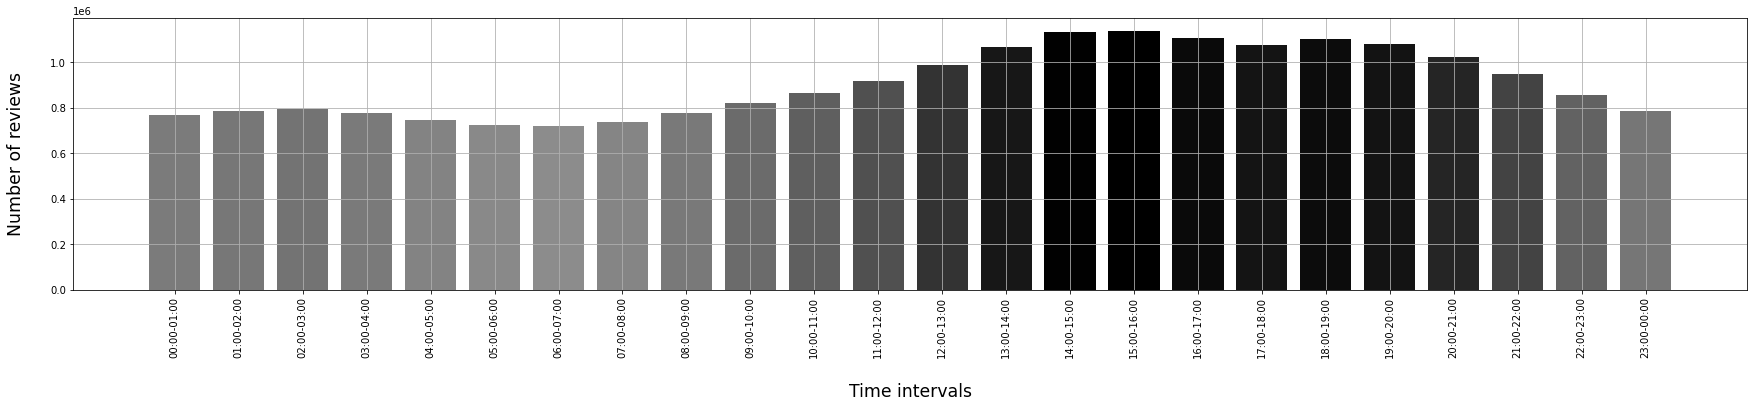

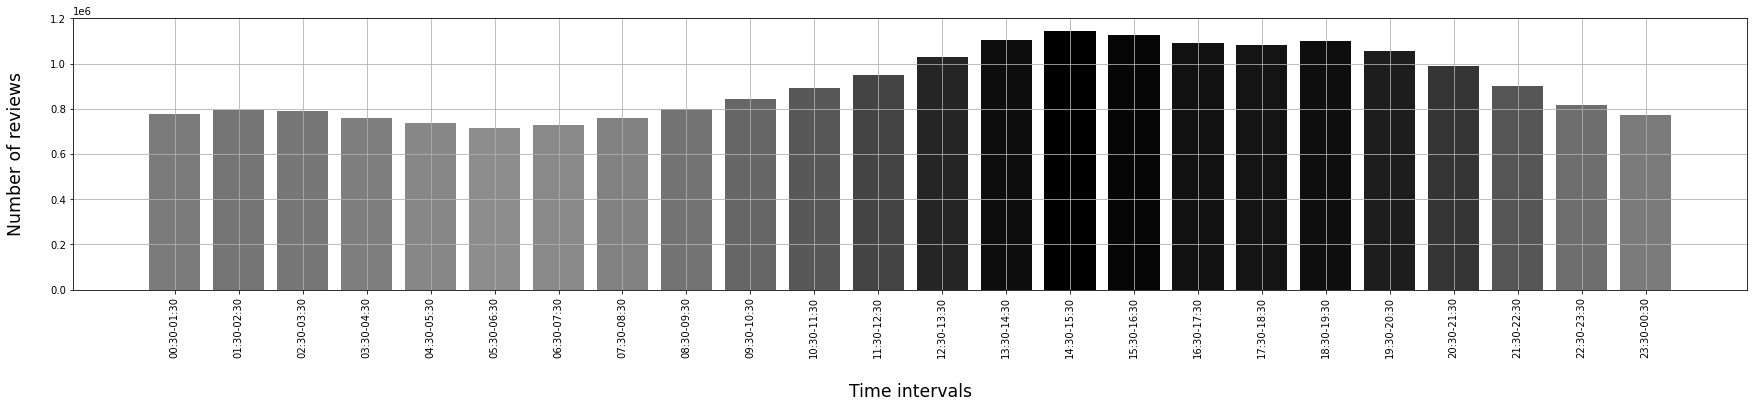

In [37]:
df.numbersOfReviewByTime(df.datetime_range24(delta = 15));
df.numbersOfReviewByTime(df.datetime_range24(delta = 30));
df.numbersOfReviewByTime(df.datetime_range24(delta = 60));
df.numbersOfReviewByTime(df.datetime_range24(startM=30,endM=30,delta=60));

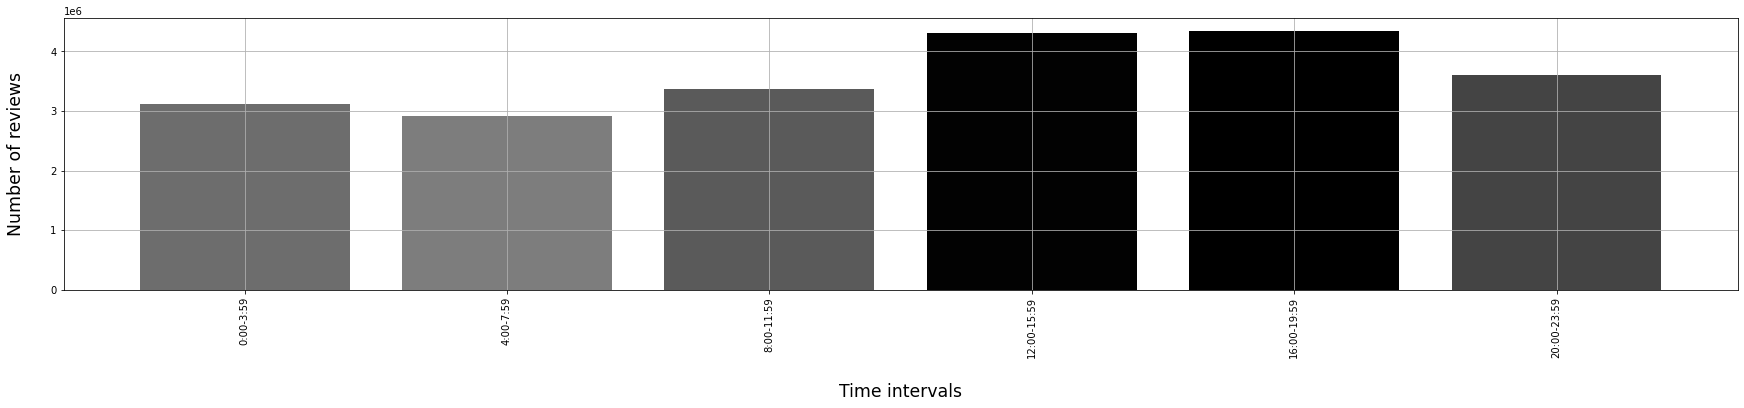

In [49]:
df.numbersOfReviewByTime([["0:00", "3:59"], ["4:00", "7:59"], ["8:00", "11:59"], ["12:00", "15:59"], ["16:00", "19:59"], ["20:00", "23:59"]]);

Ora applichiamo la funzione utilizzata precedentemente su i seguenti intervalli richiesti:
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

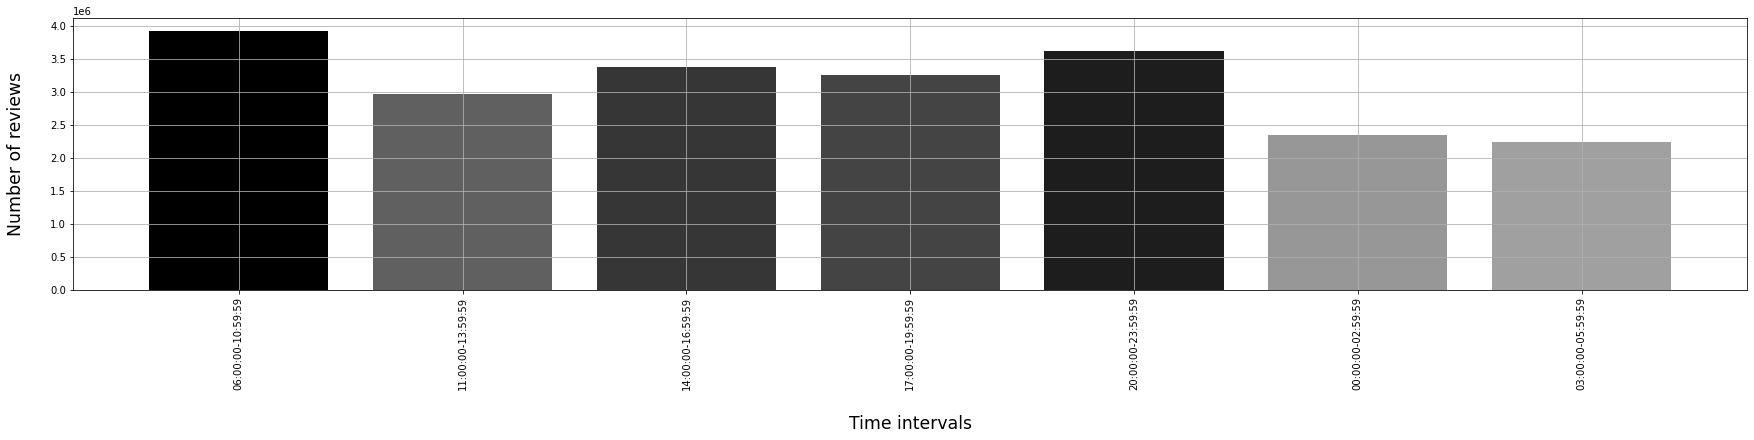

In [50]:
df.numbersOfReviewByTime([["06:00:00", "10:59:59"],["11:00:00", "13:59:59"], ["14:00:00",  "16:59:59"], ["17:00:00", "19:59:59"], ["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"],["03:00:00", "05:59:59"]]);

# RQ6 test

 # Average time (days and minutes) a user lets pass before he updates a review


In [52]:
t = df.timedelta_updated_created()

Analizzando il DataFrame utilizzando la funzione "describe" si può reperire che la media

In [62]:
t.describe()["mean"]

Timedelta('36 days 03:33:10.465412482')

### NOTA

Analizzando i risultati della funzione describe si può inoltre notare la presenza di un dato errato nel dataset. Una riga del dataset possiede nel campo timestamp_created un valore maggiore rispetto al campo timestamp_updated.

In [63]:
t.sort_values()

19179653    -1 days +23:59:56
0             0 days 00:00:00
13184605      0 days 00:00:00
13184604      0 days 00:00:00
13184603      0 days 00:00:00
                  ...        
1561447    3710 days 12:51:16
3538178    7790 days 08:35:39
9287504    7794 days 00:01:21
10694933   7959 days 20:10:23
14636766   8069 days 20:08:16
Length: 21747371, dtype: timedelta64[ns]

   - Plot the top 3 authors that usually update their reviews.
   
Top 3 utenti con più recensioni aggiornate (Questa lista non prende in considerazione il numero totale di recensioni per utente: un utente con più recensioni si troverà probabilmente più in alto in classifica)

,Number of update
author.steamid,
76561197960265822,1
76561198206038559,1
76561198206037939,1


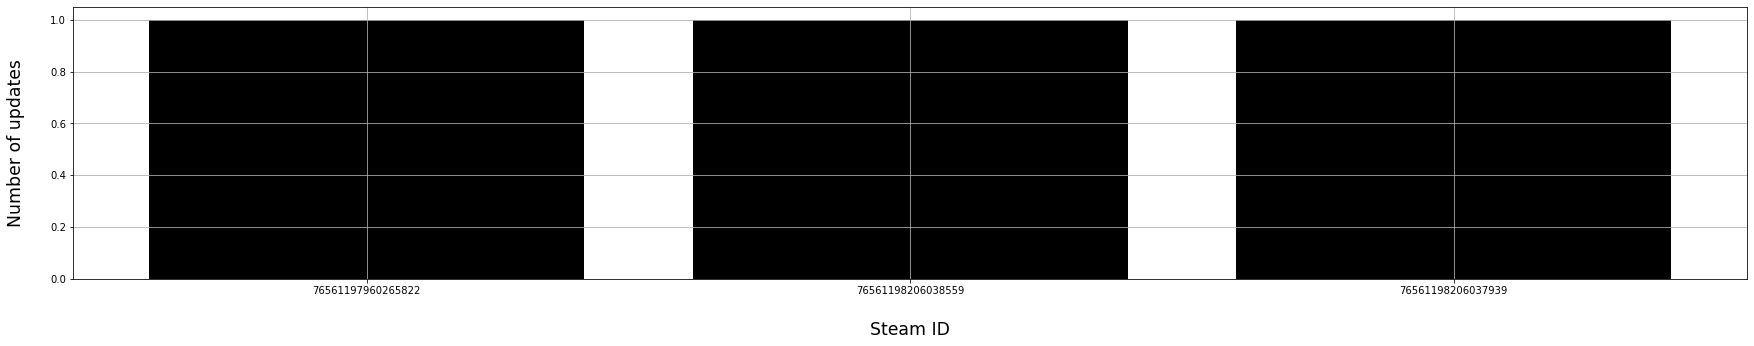

In [65]:
df.plotBestAuthor_updater(3)

Top 3 utenti con più recensioni aggiornate (Questa lista prende in considerazione il numero totale di recensioni e il numero di recensioni aggiornate)

In [ ]:
df.numberOfUpdateAndNonUpdateByAuthor(3)

# RQ2 test

,review_id
app_name,
The Elder Scrolls V: Skyrim,294966
Stardew Valley,315717
Euro Truck Simulator 2,387553
ARK: Survival Evolved,400009
Dead by Daylight,418897
The Witcher 3: Wild Hunt,469395
Among Us,485293
PAYDAY 2,487747
Rocket League,498565


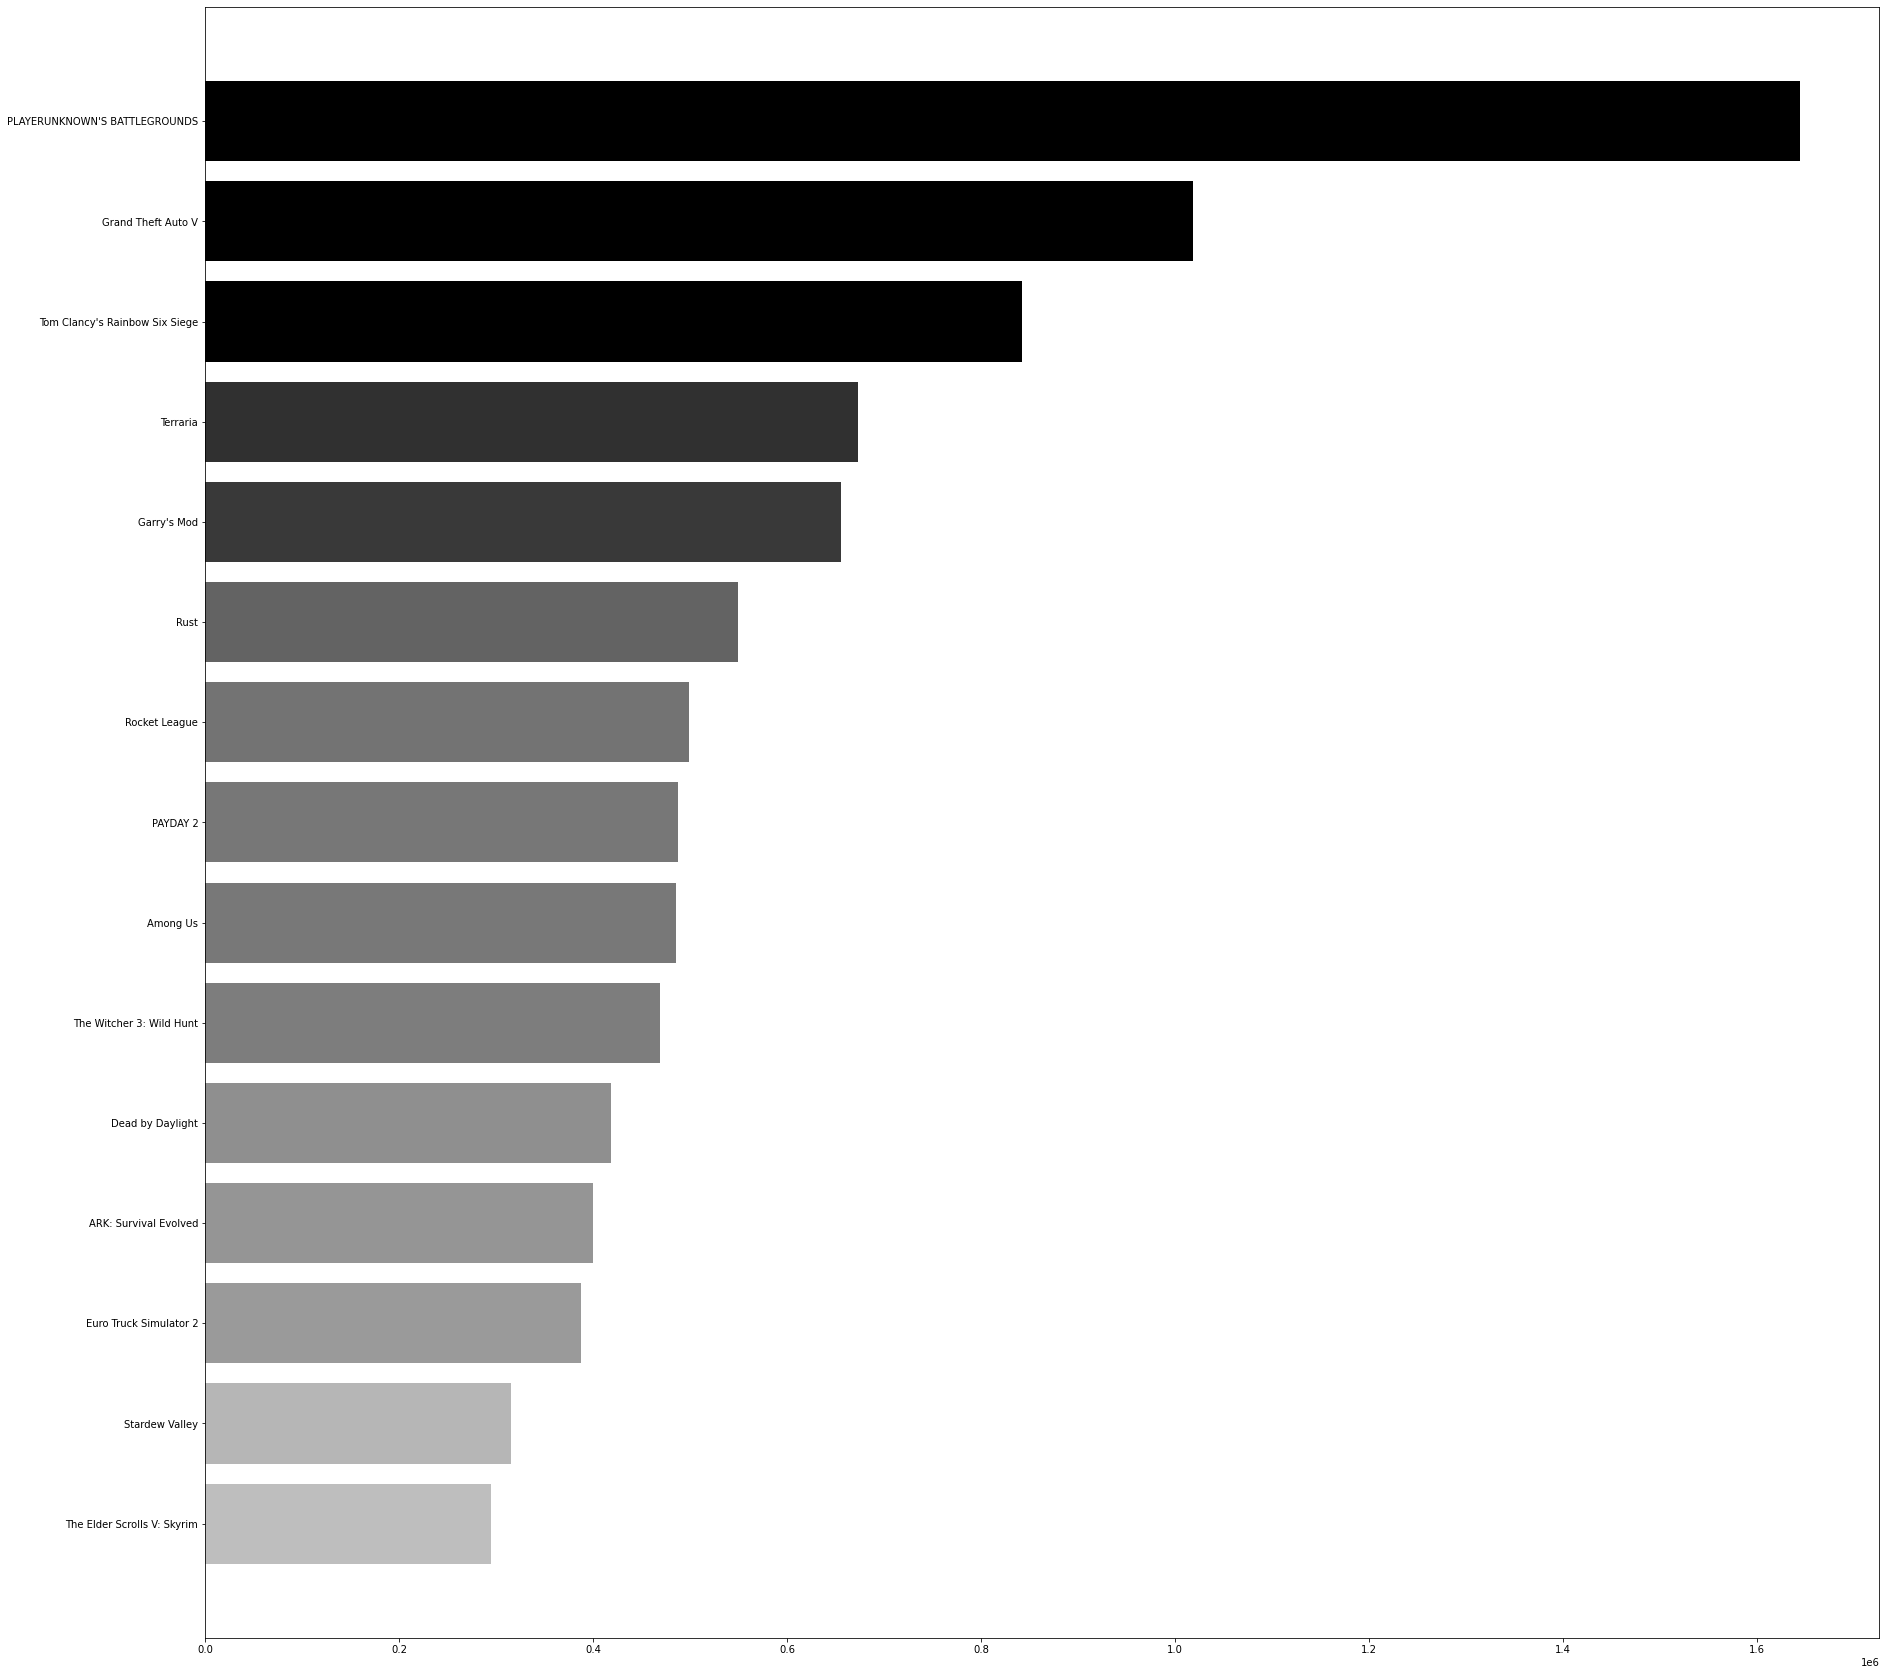

In [69]:
df.numbersOfReviewsByApplication(15)

In [70]:
df.scoreOfApps(20)

,weighted_vote_score
app_name,
Stardew Valley,0.995987
Divinity: Original Sin 2,0.995245
Subnautica,0.994453
Mirror,0.994038
Wallpaper Engine,0.993540
Terraria,0.992892
The Forest,0.992581
Monster Hunter: World,0.992500
The Elder Scrolls Online,0.992356


In [71]:
df.raccomendedApp_purchase_free(5, 3)

,recommended,received_for_free,steam_purchase
app_name,,,
PLAYERUNKNOWN'S BATTLEGROUNDS,886417,61443,1372721
Grand Theft Auto V,831311,38624,905288
Tom Clancy's Rainbow Six Siege,742397,36300,702505
Terraria,658741,20154,527762
Garry's Mod,632558,24765,551250
Identity,439,40,513
DRAGON QUEST HEROES™ II,423,7,493
Neon Hardcorps,89,27,29


# RQ7 test

In [66]:
df.probabilityQuestion1()

0.006444503107984868

In [67]:
df.probabilityQuestion2()

0.5605308077772737

In [68]:
df.probabilityQuestion3()

0.1196959393390585

# TEST

In [2]:
def filterByLang(data, languages):
    
    data.set_index("language", inplace=True)
    
    try:
        out = data.loc[languages[0]]
     
        for lang in languages[1:]:
            temp = data.loc[lang]
            out = df.pd.concat([out, temp])
    
    finally:
        data.reset_index(inplace=True)
    
    return out
    

In [3]:
t = df.steam[["language", "review_id"]].groupby(["language"]).count().sort_values("review_id", ascending=False).head(3)

In [4]:
t.index.array

<PandasArray>
['english', 'schinese', 'russian']
Length: 3, dtype: object

In [5]:
t2 = filterByLang(df.steam, t.index.array)

In [9]:
df.steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   language                        object        
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   review                          object        
 5   timestamp_created               datetime64[ns]
 6   timestamp_updated               datetime64[ns]
 7   recommended                     bool          
 8   votes_helpful                   int64         
 9   votes_funny                     int64         
 10  weighted_vote_score             float64       
 11  comment_count                   int64         
 12  steam_purchase                  bool          
 13  received_for_free               bool          
 14  written_during_early_access     bool          
 

In [11]:
uni = t2[["votes_funny"]].where(t2.votes_funny != 0).dropna()

In [22]:
uni = uni.groupby(["language"]).count()

In [21]:
tot = t2[["votes_funny"]].groupby(["language"]).count()

In [27]:
final = uni

final["tot reviews"] = tot

final["percentage"] = final.apply(lambda row: row["votes_funny"]/row["tot reviews"], axis=1)

In [40]:
final

,votes_funny,tot reviews,percentage
language,,,
english,1085997,9635437,0.112709
russian,391784,2348900,0.166795
schinese,444945,3764967,0.118180
